In [1]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from docplex.mp.model import Model


sns.set_style("darkgrid")

import pandas as pd
import numpy as np
import ast
import random
import math 
import time
import sys 

np.random.seed(123)

data = pd.read_csv("Breastdata.csv")

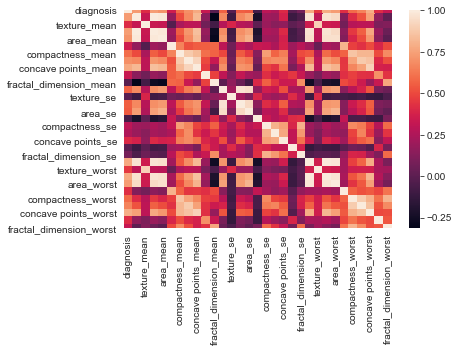

In [2]:
#Removing the Id and the Unnamed columns
data = data.iloc[:,1:-1]

#Next, we encode the Categorical Variable
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

#Generating the correlation matrix
corr = data.corr()

#Generating the correlation heat-map
sns.heatmap(corr)

In [3]:
#remove one of two features that have a correlation higher than 0.9 Note we remove the latter, is it ok?

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [4]:
#Selecting columns based on p-value
#Next we will be selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict
selected_columns = selected_columns[1:].values
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
        #print(regressor_OLS.summary())
    print(regressor_OLS.summary())
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)



                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.833
Model:                            OLS   Adj. R-squared (uncentered):              0.829
Method:                 Least Squares   F-statistic:                              213.6
Date:                Fri, 11 Oct 2019   Prob (F-statistic):                   2.22e-206
Time:                        11:54:58   Log-Likelihood:                         -16.959
No. Observations:                 569   AIC:                                      59.92
Df Residuals:                     556   BIC:                                      116.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [5]:
#Moving the result to a new Dataframe
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

#Creating a Dataframe with the columns selected using the p-value and correlation
data = pd.DataFrame(data = data_modeled, columns = selected_columns)

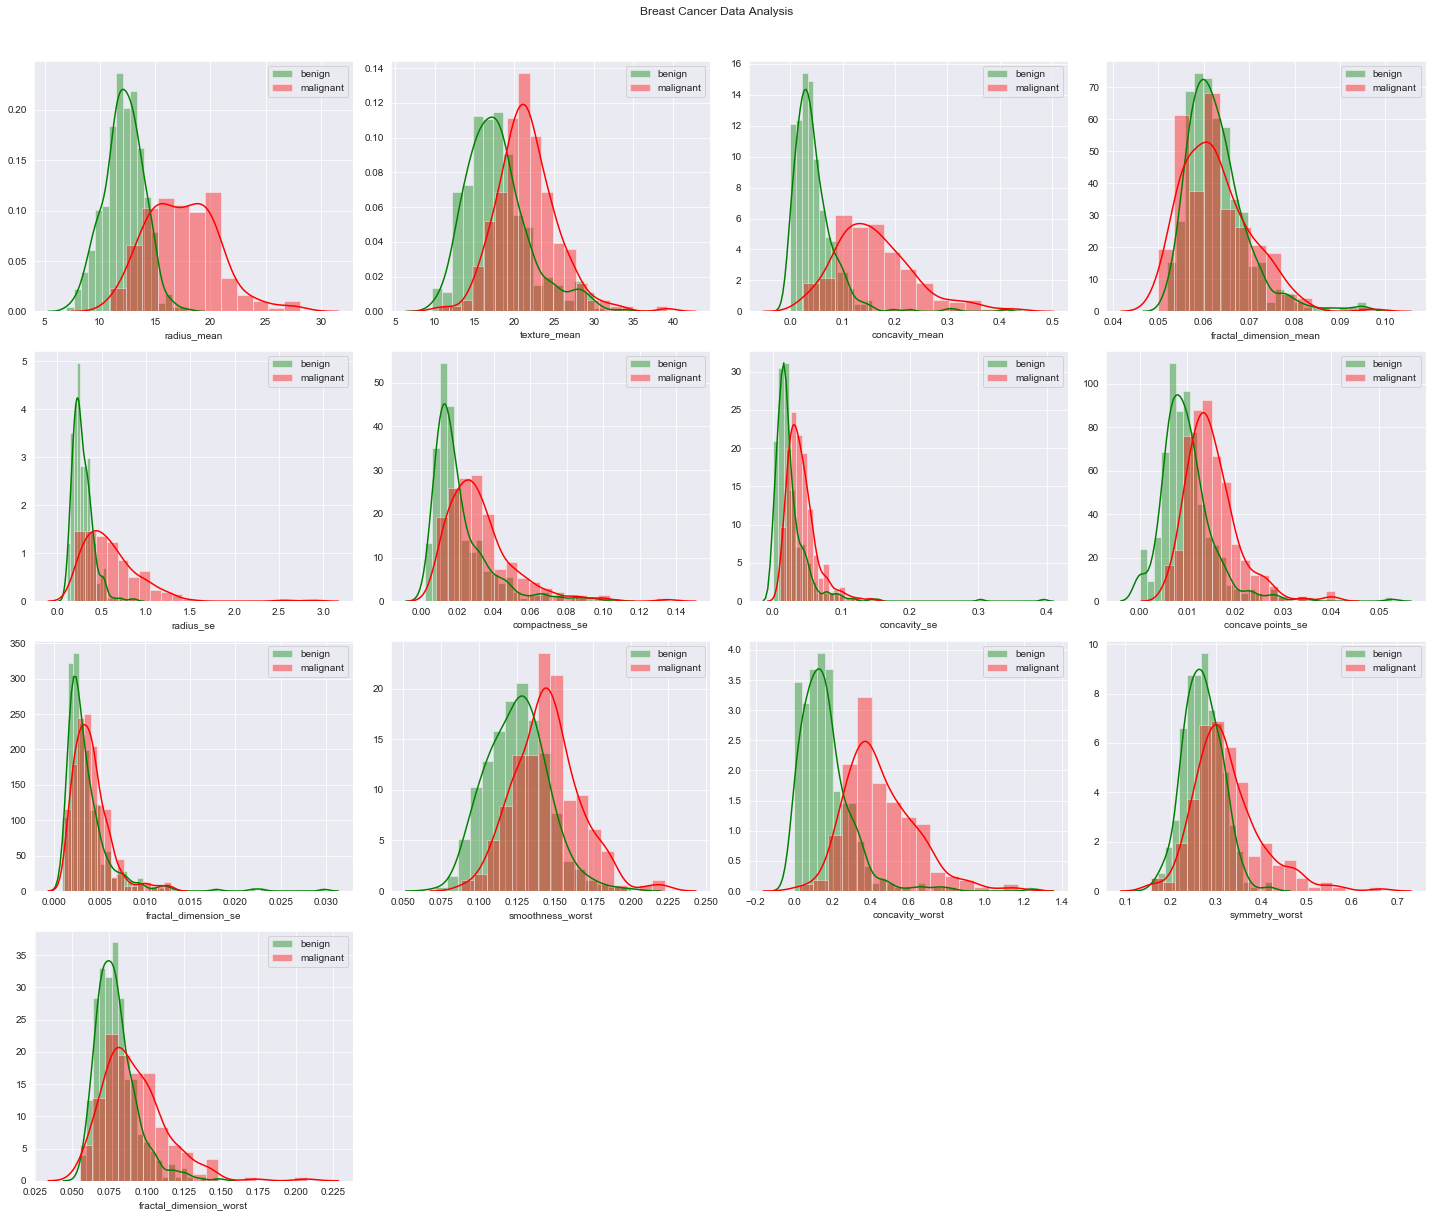

In [6]:
#Plotting the data to visualize their distribution

fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cancer Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [7]:
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2, random_state = 42)

#Support Vector Classifier
svc=SVC() # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)


prediction = svc.predict(x_test)

cm = confusion_matrix(y_test, prediction)
print(accuracy_score(y_test, prediction))
print(cm)
print (roc_auc_score(y_test, prediction))


0.956140350877193
[[70  1]
 [ 4 39]]
0.9464461185718964


In [8]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
prediction=logreg.predict(x_test)


cm = confusion_matrix(y_test, prediction)
print(accuracy_score(y_test, prediction))
print(cm)
print (roc_auc_score(y_test, prediction))


0.9473684210526315
[[71  0]
 [ 6 37]]
0.9302325581395349


In [9]:
data = pd.read_csv('Breastdata.csv')          

#Removing the Id and the Unnamed columns
data = data.iloc[:,1:-1]

#Next, we encode the Categorical Variable
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

#Moving the result to a new Dataframe
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2, random_state = 42)      
svc = SVC()
svc.fit(x_train, y_train)
prediction = svc.predict(x_test)

cm = confusion_matrix(y_test, prediction)
print(accuracy_score(y_test, prediction))
print(cm)
print (roc_auc_score(y_test, prediction))

0.6228070175438597
[[71  0]
 [43  0]]
0.5
